In [1]:
source("../data/env/variables.R")
source("~/wisdom/r/data_analysis_environment.R")
source("~/wisdom/r/clean_theme.R")

# read switches
switches <- read_tsv("../data/pancancer/candidateList_full.tsv") %>%
    filter(Reliable==1)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



# Stoma/immune associated switches

Warning message:
: replacing previous import by ‘scales::alpha’ when loading ‘UpSetR’

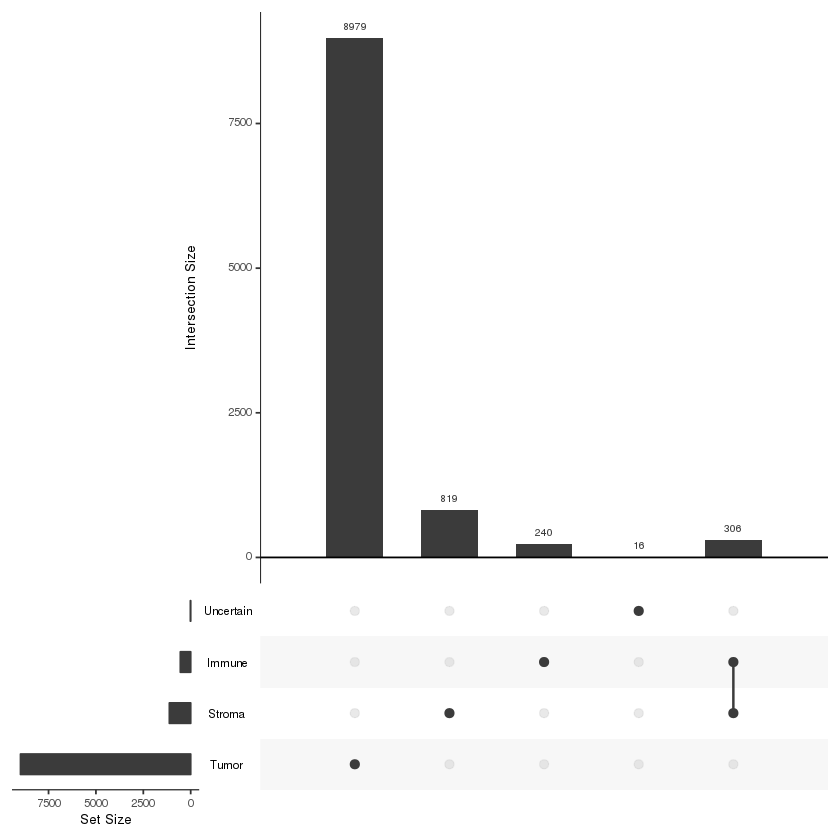

In [2]:
library(UpSetR)

switches %>%
    .$Origin %>%
    table %>%
    fromExpression(.) %>%
    upset

We cannot link an artifactual origin to most of the switches.

Loading required package: RColorBrewer


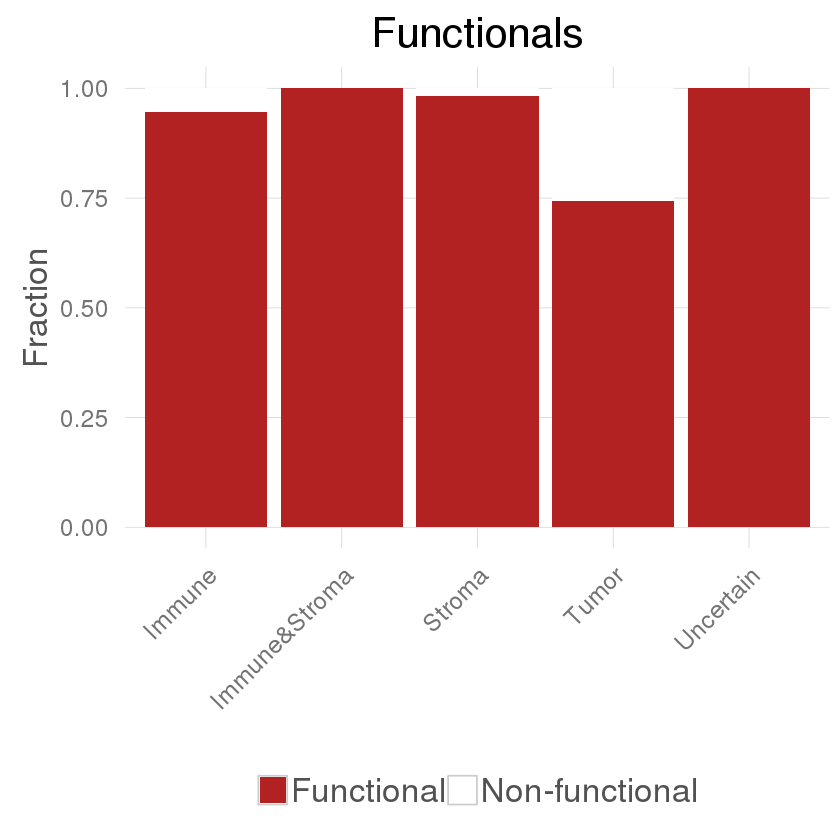

In [3]:
ggplot(switches, aes(x=Origin, fill=ifelse(IsFunctional==1, "Functional", "Non-functional"))) +
    geom_bar(position="fill") +
    labs(x="", y="Fraction", fill="", title="Functionals") +
    clean_theme() +
    theme(legend.position="bottom", axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_fill_manual(values = c("Functional"="firebrick", "Non-functional"="white"))

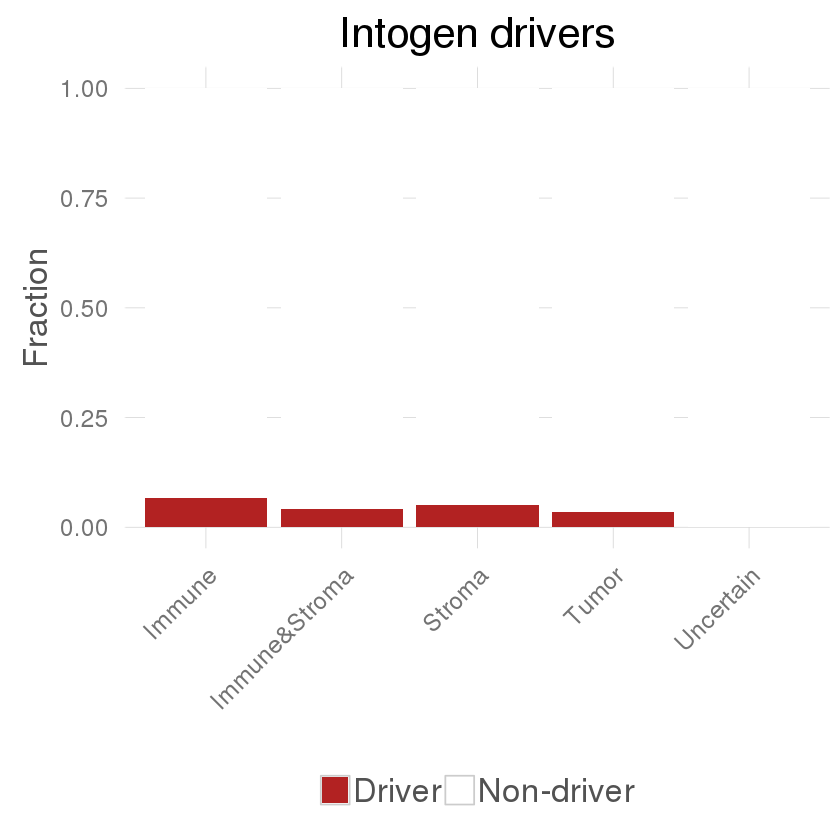

In [4]:
drivers <- read_tsv("../data/intogen_cancer_drivers-2014.12b/Mutational_drivers_per_tumor_type.tsv",comment="#") %>%
  set_colnames(c("Symbol","Tumor"))

ggplot(switches, aes(x=Origin, fill=ifelse(Driver==1, "Driver", "Non-driver"))) +
    geom_bar(position="fill") +
    labs(x="", y="Fraction" , fill="", title="Intogen drivers") +
    clean_theme() +
    theme(legend.position="bottom", axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_fill_manual(values = c("Driver"="firebrick", "Non-driver"="white"))

The proportion of drivers affected are similar across categories, albeit unexpectedly lower in Tumor switches.

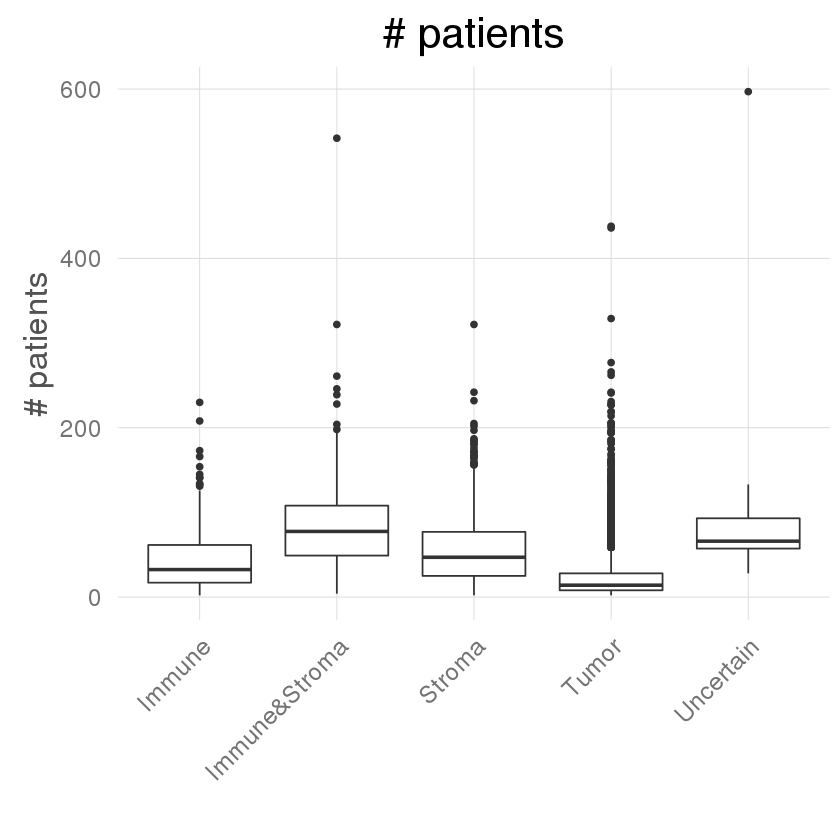

In [5]:
ggplot(switches, aes(x=Origin, y=PatientNumber)) +
    geom_boxplot() +
    labs(x="", y="# patients", title="# patients") +
    clean_theme() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

Interestingly, most of the stroma/immune specific genes do not show a correlation with the presence of stroma/immune cells, respectively.

# Intersection with PoTuS

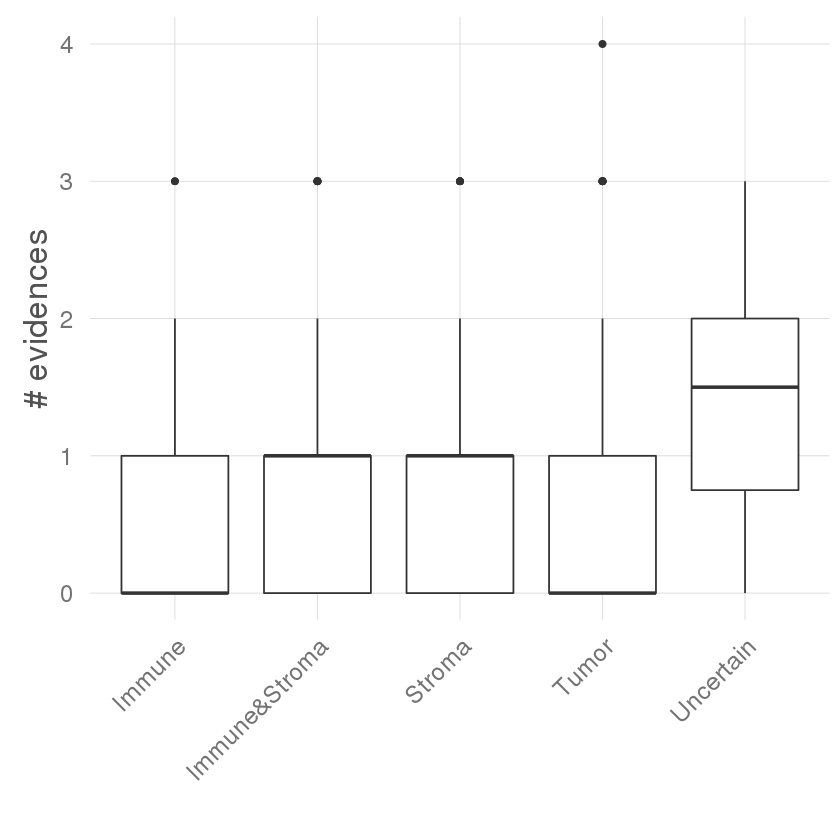

In [6]:
switches %>%
    filter(IsFunctional==1) %>%
    mutate(ASDriver = Recurrence+Affects_mutated_feature+PPI+as.logical(Pannegative)) %>%
    ggplot(aes(x = Origin, y = ASDriver)) +
        geom_boxplot() +
        labs(x="", y="# evidences") +
        clean_theme() + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

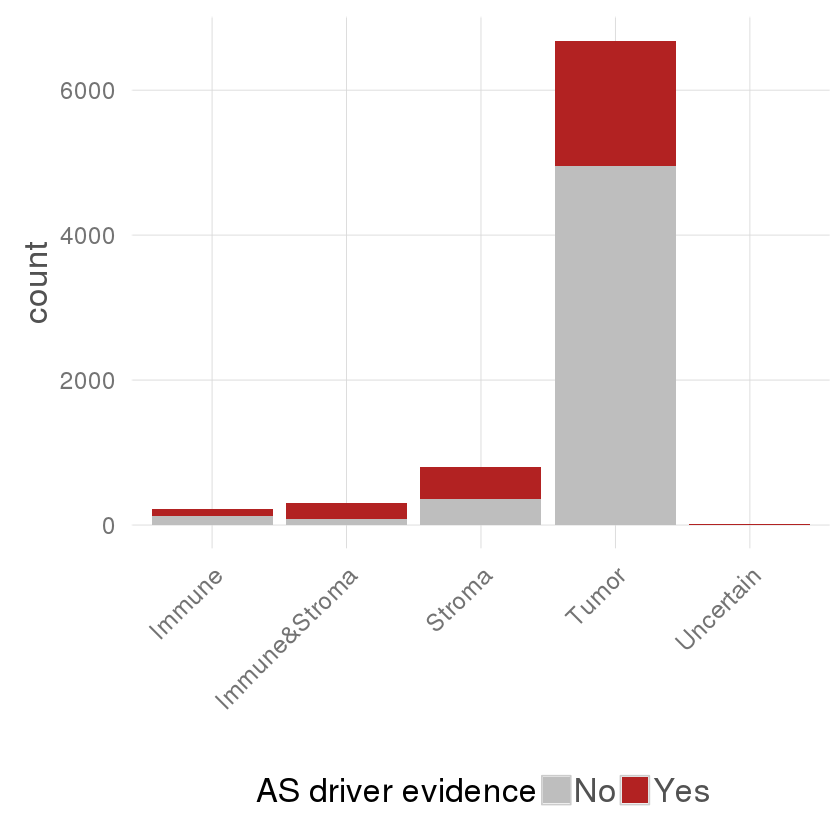

In [7]:
switches %>%
    filter(IsFunctional==1) %>%
    mutate( Candidate = ifelse(Candidate==1, "Yes", "No")) %>%
    ggplot(aes(x = Origin, fill = Candidate)) +
        geom_bar() +
        clean_theme() +
        labs(fill="AS driver evidence", x="") +
        theme(legend.position="bottom", axis.text.x = element_text(angle = 45, hjust = 1)) +
        scale_fill_manual(values = c("Yes"="firebrick", "No"="grey"))

In [8]:
# number of candidates with unclear origin
switches %>%
    filter(IsFunctional==1 & Origin != "Tumor" & Candidate == 1) %>% 
    nrow

# total number of candidates
switches %>%
    filter(IsFunctional==1 & Candidate == 1) %>%
    nrow

[1] 789

[1] 2518

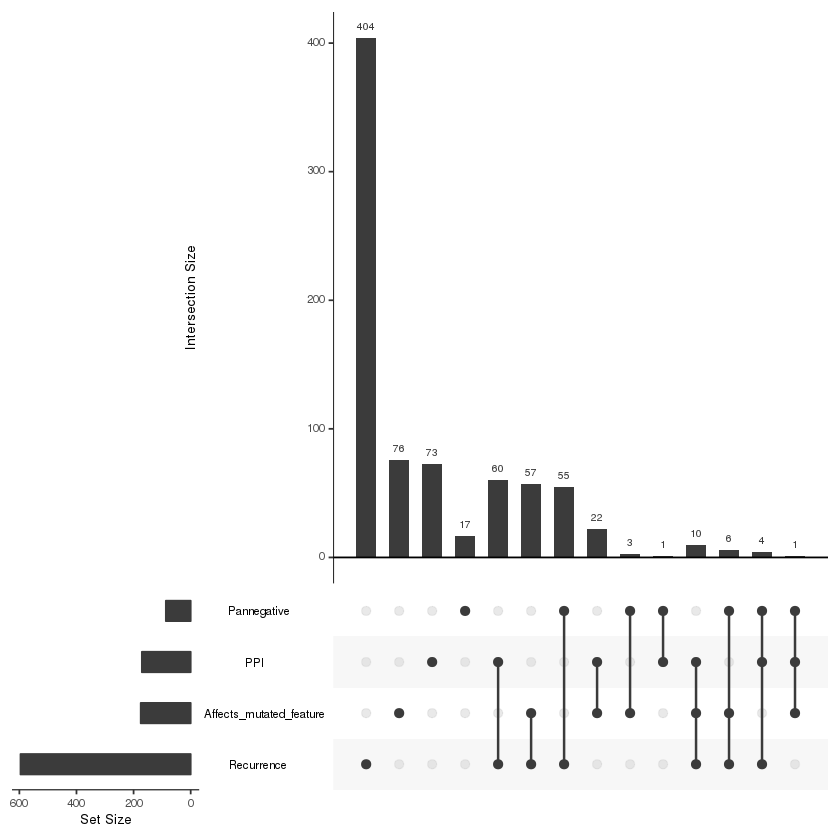

In [9]:
# explore how they affect each category
switches %>%
    filter(IsFunctional==1 & Candidate == 1 & Origin != "Tumor") %>%
    select(Recurrence:Pannegative) %>%
    mutate(Pannegative = ifelse(Pannegative > 0, 1, 0)) %>%
    as.data.frame %>%
    upset()